<a href="https://colab.research.google.com/github/KowgAnna/previsao-vendas-delivery-center/blob/main/Trabalho_IIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'brazilian-delivery-center' dataset.
Arquivos carregados com sucesso!
Pedidos: (368999, 29)
Lojas: (951, 7)


/tmp/ipython-input-1518895473.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pedidos["order_moment_created"] = pd.to_datetime(pedidos["order_moment_created"], errors="coerce")



Valores nulos por coluna (após limpeza):
order_moment_delivered               348637
order_metric_walking_time             73314
order_metric_paused_time              70662
order_moment_in_expedition            66688
order_metric_collected_time           50758
order_moment_collected                42171
order_metric_expediton_speed_time     33847
order_metric_transit_time             25126
order_moment_delivering               24588
order_metric_production_time          24387
order_moment_ready                    24386
order_metric_cycle_time               14893
order_moment_finished                 14872
order_moment_accepted                  9451
order_delivery_cost                    7197
channel_id                                0
store_id                                  0
order_id                                  0
payment_order_id                          0
order_created_day                         0
order_created_month                       0
order_created_year                

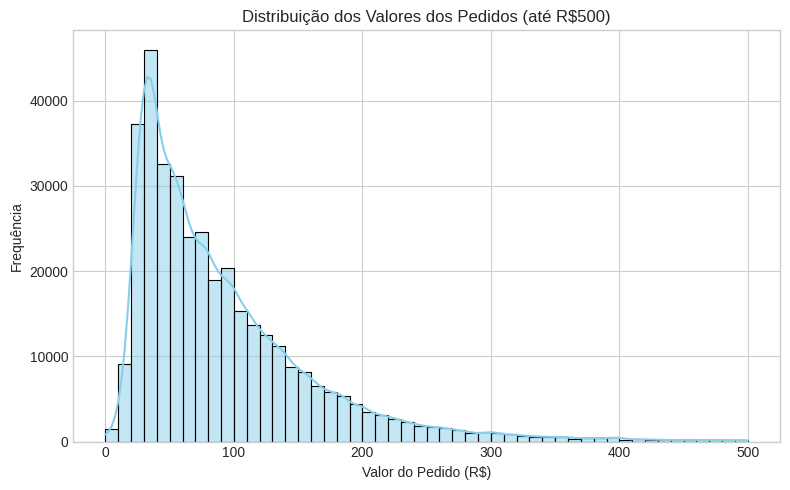

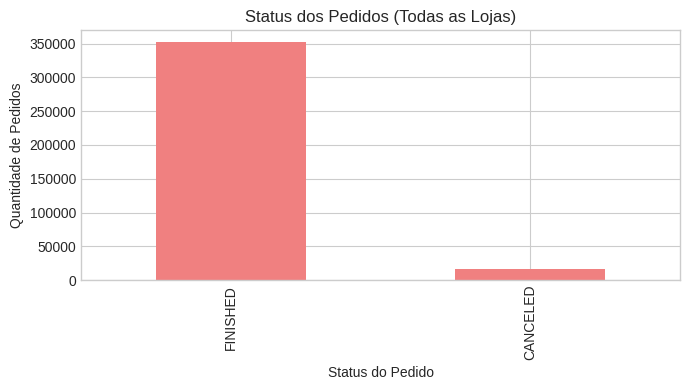

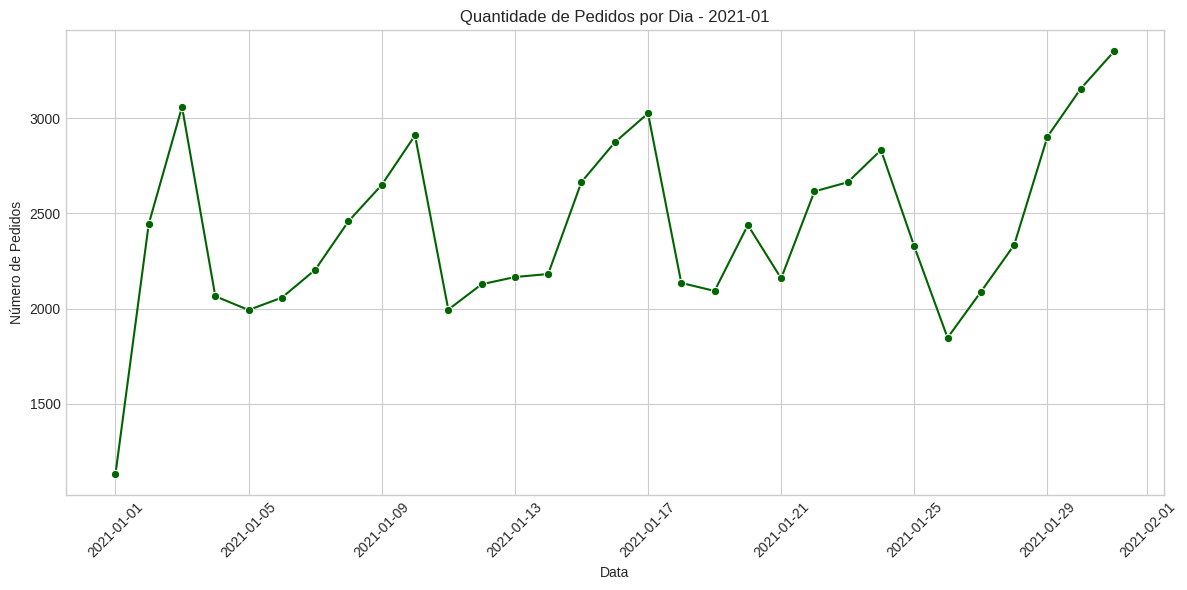

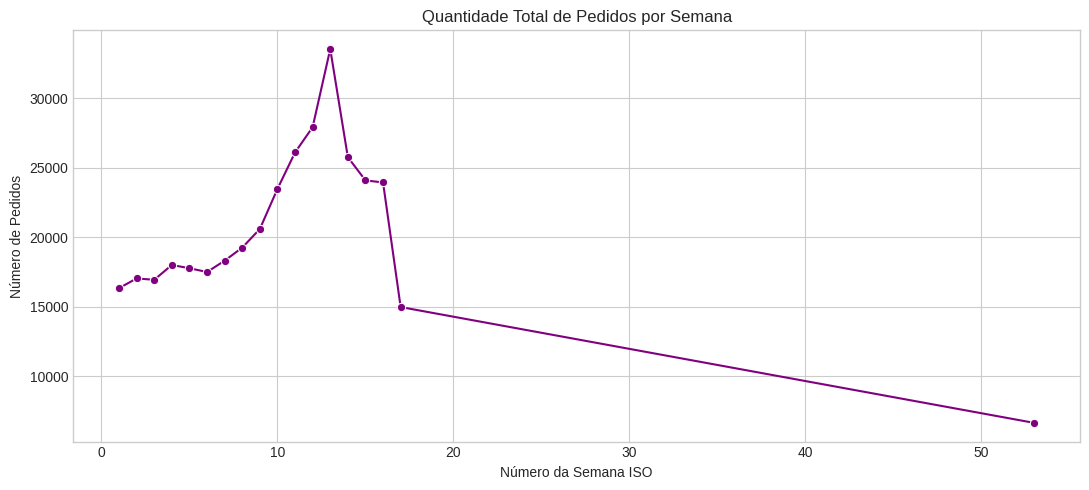


Total de restaurantes únicos: 947
Exemplo dos 100 com mais pedidos:


,store_id,store_name,qtd_pedidos
3,53,PAPA SUCIS,14004
133,676,IUMPICA,12327
152,707,IUMPICA,9271
21,149,IUMPICA,8110
32,274,IUMPICA,7920
...,...,...,...
758,3595,IASZPILITA,264
711,3265,EAVAMI FIGOI,263
419,1528,EULARAI MRIPACIA,260
135,679,ZIRIE,259


/tmp/ipython-input-1518895473.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_100_lojas["store_name"], x=top_100_lojas["qtd_pedidos"],


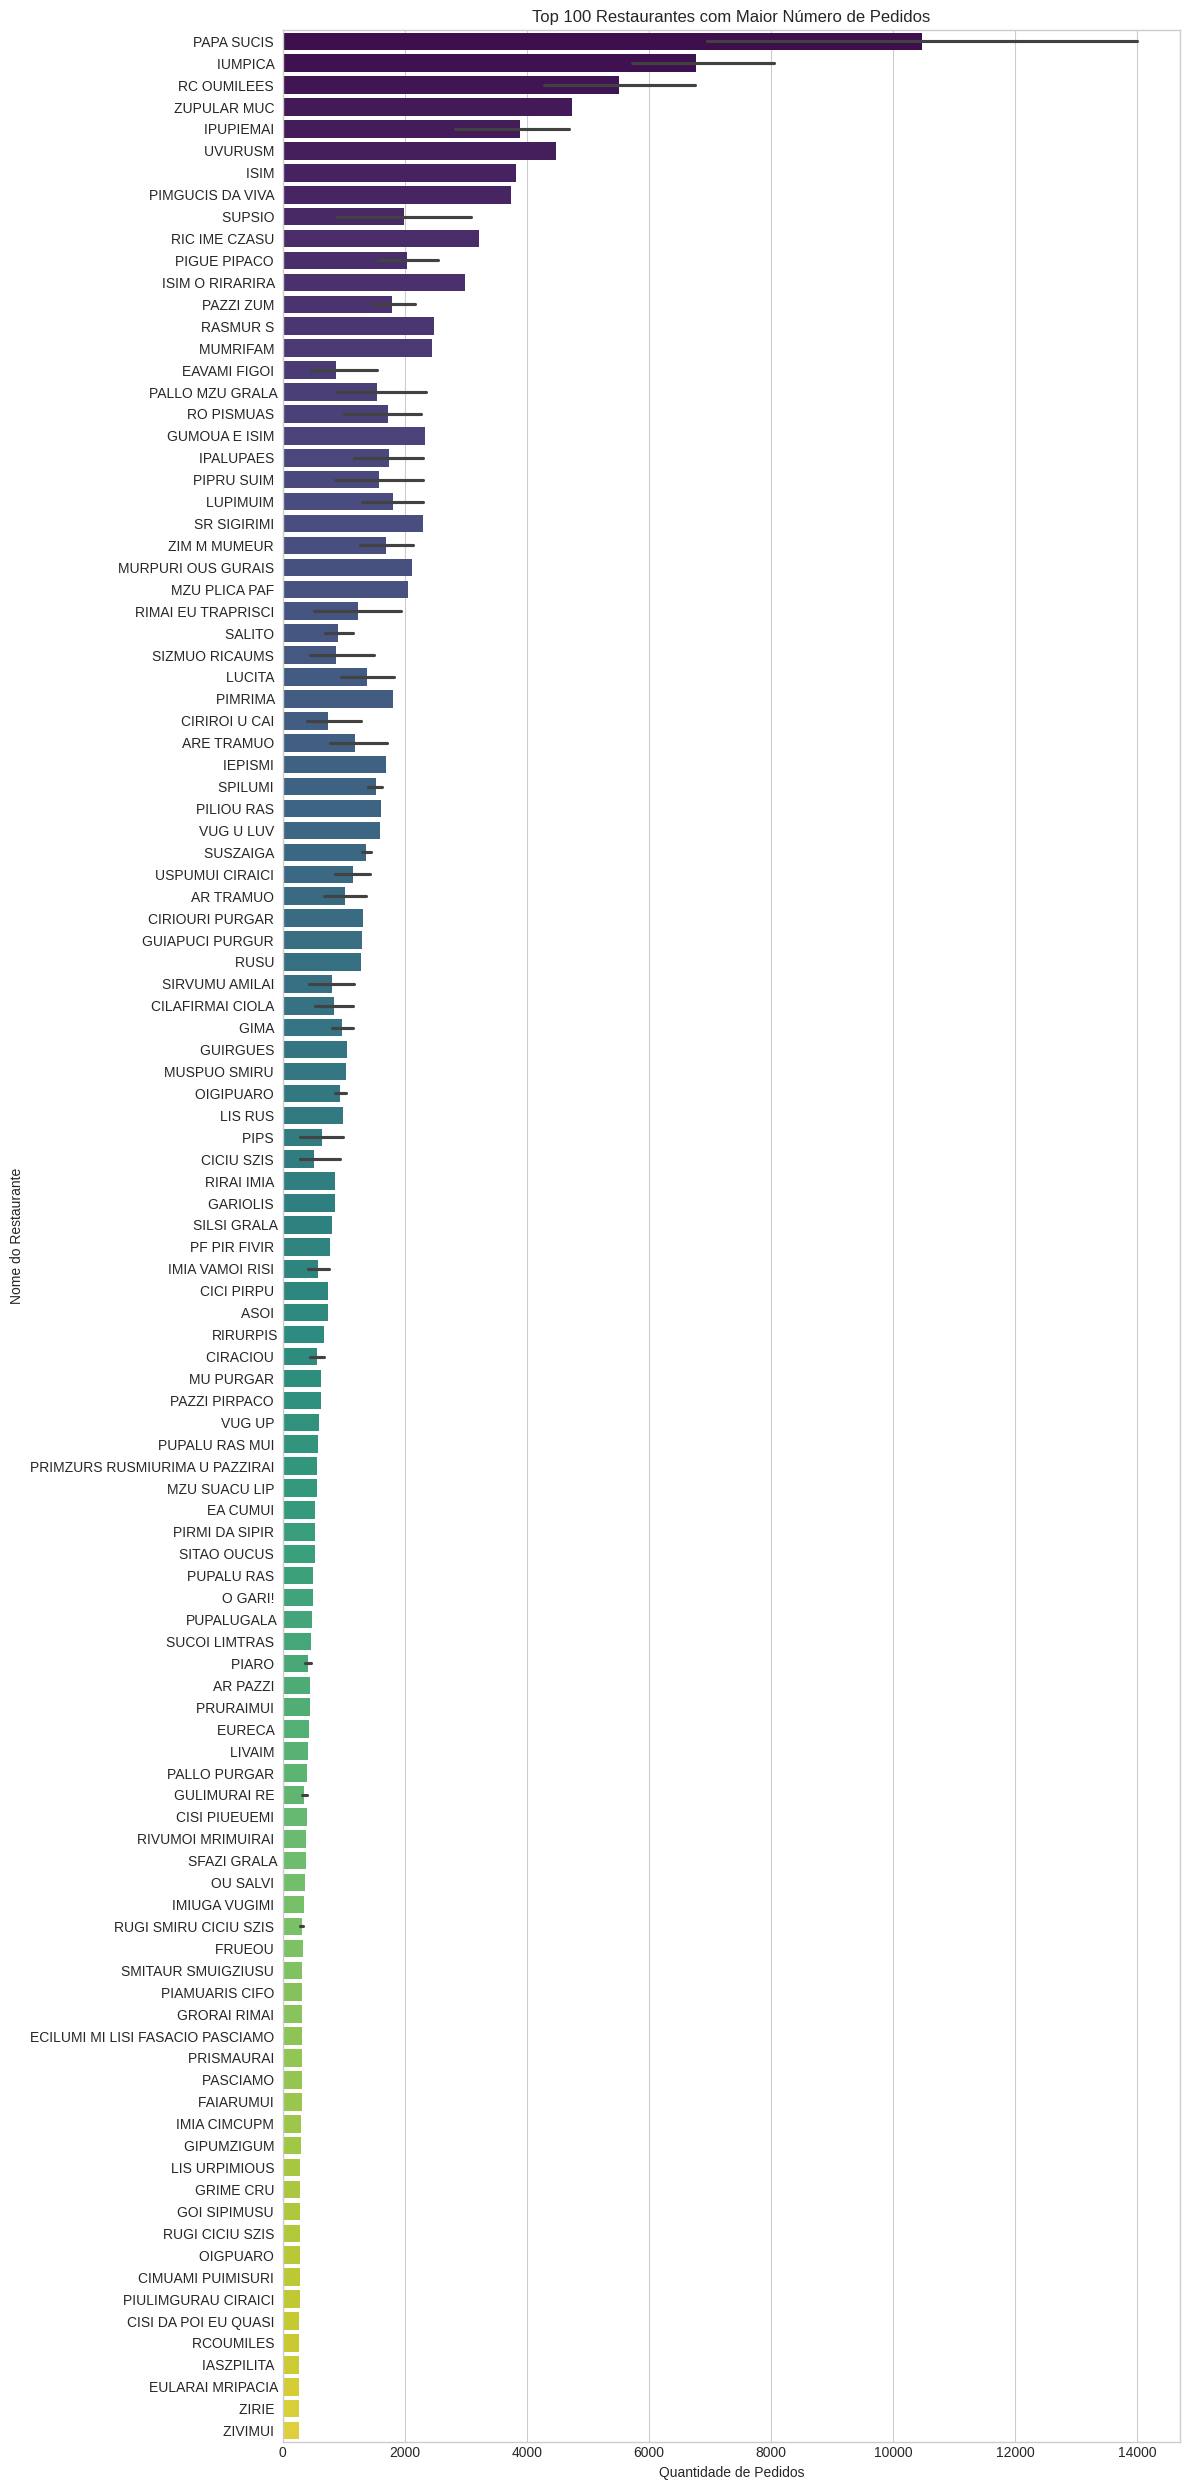

/tmp/ipython-input-1518895473.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_segmento.values, y=vendas_por_segmento.index,


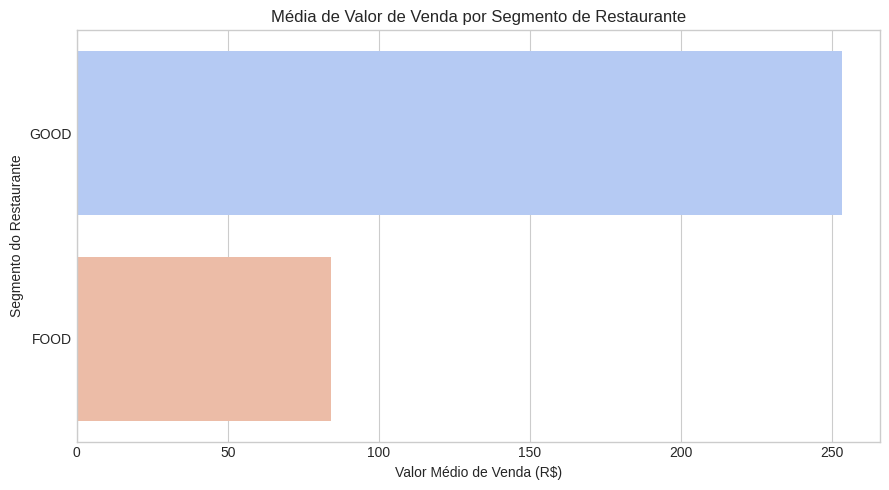



PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA:
- O dataset contém aproximadamente 370 mil pedidos e 951 restaurantes.
- Limpeza realizada: removidas datas inválidas e pedidos com valor <= 0.
- Distribuição de valores mostrada até R$500 para melhor visualização.
- Análise diária exemplificada com janeiro de 2021.
- Nomes dos restaurantes incluídos nos gráficos.


In [14]:
# PROJETO: Previsão de Vendas Diárias - EDA Completa
# Disciplina: Inteligência Artificial - IF Goiano / Campus Iporá

# Importação das Bibliotecas
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual dos gráficos
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("crest")

# Download e Leitura dos Dados
caminho = kagglehub.dataset_download("nosbielcs/brazilian-delivery-center")

# Lendo os arquivos CSV com codificação latina
pedidos = pd.read_csv(f"{caminho}/orders.csv", encoding="latin-1")
lojas = pd.read_csv(f"{caminho}/stores.csv", encoding="latin-1")

# Mostra o tamanho dos datasets
print("Arquivos carregados com sucesso!")
print("Pedidos:", pedidos.shape)
print("Lojas:", lojas.shape)

# Conversão de Datas
pedidos["order_moment_created"] = pd.to_datetime(pedidos["order_moment_created"], errors="coerce")

# Remove linhas sem data válida
pedidos = pedidos.dropna(subset=["order_moment_created"])

# Criação de Colunas Temporais
pedidos["data_pedido"] = pedidos["order_moment_created"].dt.date
pedidos["semana_pedido"] = pedidos["order_moment_created"].dt.isocalendar().week
pedidos["dia_semana_num"] = pedidos["order_moment_created"].dt.weekday
pedidos["mes_num"] = pedidos["order_moment_created"].dt.month

# Dicionários para traduzir números em nomes
dias_mapeamento = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}

meses_mapeamento = {
    1: "janeiro", 2: "fevereiro", 3: "março", 4: "abril",
    5: "maio", 6: "junho", 7: "julho", 8: "agosto",
    9: "setembro", 10: "outubro", 11: "novembro", 12: "dezembro"
}

# Mapeia os números para os nomes
pedidos["dia_semana"] = pedidos["dia_semana_num"].map(dias_mapeamento)
pedidos["mes"] = pedidos["mes_num"].map(meses_mapeamento)

# Limpeza de Dados
pedidos = pedidos.dropna(subset=["order_amount"])
pedidos = pedidos[pedidos["order_amount"] > 0]

# Exibe a contagem de valores nulos
print("\nValores nulos por coluna (após limpeza):")
print(pedidos.isnull().sum().sort_values(ascending=False))

# Estatísticas descritivas
print("\nEstatísticas descritivas de order_amount:")
print(pedidos["order_amount"].describe())

# Distribuição dos Valores dos Pedidos
pedidos_filtrado = pedidos[pedidos["order_amount"] <= 500]

plt.figure(figsize=(8,5))
sns.histplot(pedidos_filtrado["order_amount"], bins=50, kde=True, color="skyblue")
plt.title("Distribuição dos Valores dos Pedidos (até R$500)")
plt.xlabel("Valor do Pedido (R$)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# Status dos Pedidos
plt.figure(figsize=(7,4))
pedidos["order_status"].value_counts().plot(kind="bar", color="lightcoral")
plt.title("Status dos Pedidos (Todas as Lojas)")
plt.xlabel("Status do Pedido")
plt.ylabel("Quantidade de Pedidos")
plt.tight_layout()
plt.show()

# Pedidos por Dia (Exemplo: Janeiro/2021)
data_inicio = "2021-01-01"
data_fim = "2021-02-01"

# Filtra pedidos do período
pedidos_mes = pedidos[(pedidos["order_moment_created"] >= data_inicio) &
                       (pedidos["order_moment_created"] < data_fim)]

# Conta pedidos por dia
pedidos_diarios = (
    pedidos_mes.groupby("data_pedido")["order_id"]
    .count()
    .reset_index()
    .rename(columns={"order_id":"quantidade_pedidos"})
)

pedidos_diarios = pedidos_diarios.sort_values("data_pedido")

# Gráfico de pedidos por dia
plt.figure(figsize=(12,6))
sns.lineplot(data=pedidos_diarios, x="data_pedido", y="quantidade_pedidos",
             marker="o", color="darkgreen")
plt.title(f"Quantidade de Pedidos por Dia - {data_inicio[:7]}")
plt.xlabel("Data")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pedidos por Semana
pedidos_semanais = (
    pedidos.groupby("semana_pedido")["order_id"]
    .count()
    .reset_index()
    .rename(columns={"order_id":"quantidade_pedidos"})
)

plt.figure(figsize=(11,5))
sns.lineplot(data=pedidos_semanais, x="semana_pedido", y="quantidade_pedidos",
             marker="o", color="purple")
plt.title("Quantidade Total de Pedidos por Semana")
plt.xlabel("Número da Semana ISO")
plt.ylabel("Número de Pedidos")
plt.tight_layout()
plt.show()

# Total de Pedidos por Restaurante
pedidos_por_loja = (
    pedidos.merge(lojas[["store_id", "store_name"]], on="store_id", how="left")
    .groupby(["store_id", "store_name"])["order_id"]
    .count()
    .reset_index()
    .rename(columns={"order_id": "qtd_pedidos"})
    .sort_values(by="qtd_pedidos", ascending=False)
)

print("\nTotal de restaurantes únicos:", pedidos_por_loja.shape[0])
print("Exemplo dos 100 com mais pedidos:")
display(pedidos_por_loja.head(200))

# Gráfico dos top 100 restaurantes
top_100_lojas = pedidos_por_loja.head(200)

plt.figure(figsize=(12,25))
sns.barplot(y=top_100_lojas["store_name"], x=top_100_lojas["qtd_pedidos"],
            palette="viridis")
plt.title("Top 100 Restaurantes com Maior Número de Pedidos")
plt.xlabel("Quantidade de Pedidos")
plt.ylabel("Nome do Restaurante")
plt.tight_layout()
plt.show()

# Análise por Segmento de Restaurante
dados_completos = pedidos.merge(lojas, on="store_id", how="left")

# Padroniza os segmentos
dados_completos["store_segment"] = dados_completos["store_segment"].replace({
    "good": "food",
    "Food": "food",
    "Beverages": "beverages"
})

# Traduz segmentos
segmento_mapeamento = {
    "food": "Comida",
    "beverages": "Bebidas"
}
dados_completos["segmento"] = dados_completos["store_segment"].map(segmento_mapeamento).fillna(dados_completos["store_segment"])

# Calcula média por segmento
vendas_por_segmento = (
    dados_completos.groupby("segmento")["order_amount"]
    .mean()
    .sort_values(ascending=False)
)

# Gráfico de média por segmento
plt.figure(figsize=(9,5))
sns.barplot(x=vendas_por_segmento.values, y=vendas_por_segmento.index,
            palette="coolwarm")
plt.title("Média de Valor de Venda por Segmento de Restaurante")
plt.xlabel("Valor Médio de Venda (R$)")
plt.ylabel("Segmento do Restaurante")
plt.tight_layout()
plt.show()

# Resumo Final
print("\n\nPRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA:")
print("- O dataset contém aproximadamente 370 mil pedidos e 951 restaurantes.")
print("- Limpeza realizada: removidas datas inválidas e pedidos com valor <= 0.")
print("- Distribuição de valores mostrada até R$500 para melhor visualização.")
print("- Análise diária exemplificada com janeiro de 2021.")
print("- Nomes dos restaurantes incluídos nos gráficos.")

Using Colab cache for faster access to the 'brazilian-delivery-center' dataset.
Arquivos carregados com sucesso!
Pedidos: (368999, 29)
Lojas: (951, 7)


/tmp/ipython-input-3169584803.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["order_moment_created"] = pd.to_datetime(orders["order_moment_created"], errors="coerce")


Colunas de segmento detectadas: ['store_segment_FOOD', 'store_segment_GOOD']

MÉTRICAS DO MODELO BASE:
MAE: 0.7925
RMSE: 1.0257
R²: 0.5092


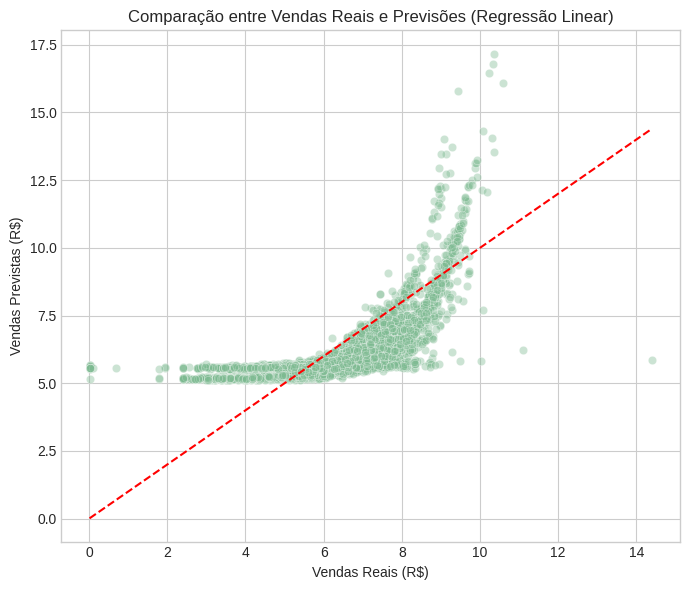

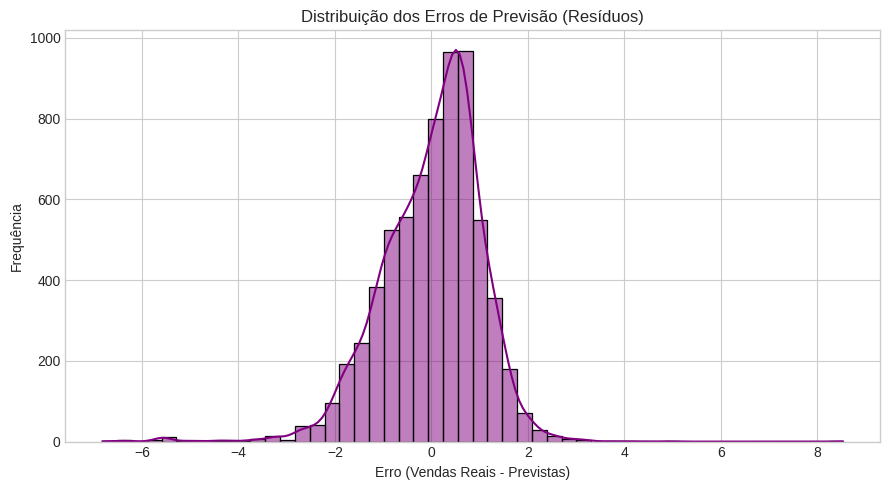

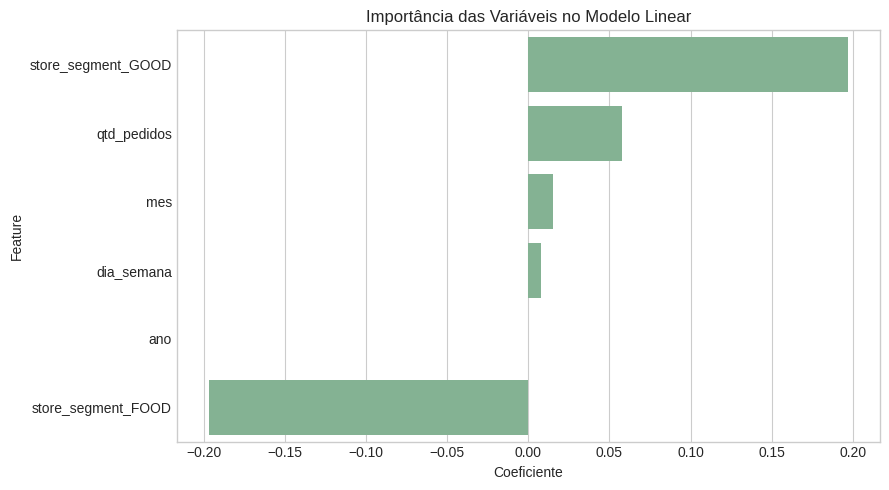


Etapa 2 completa: Pré-processamento, Feature Engineering e Modelo Base


In [12]:
# PROJETO: Previsão de Vendas Diárias - Etapa 2
# Objetivo: Criar um modelo base de Inteligência Artificial
# para prever o valor total de vendas (em R$) de restaurantes
# a partir de dados históricos do dataset "Brazilian Delivery Center".

# Importação das Bibliotecas
import kagglehub                    # para baixar o dataset diretamente do Kaggle
import pandas as pd                 # para manipulação de dados (DataFrames)
import numpy as np                  # para cálculos numéricos e vetorizados
import matplotlib.pyplot as plt     # para gráficos
import seaborn as sns               # para gráficos mais bonitos e estatísticos

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split     # separa treino e teste
from sklearn.linear_model import LinearRegression        # modelo de regressão linear
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # métricas de avaliação

# Configuração de estilo dos gráficos
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("crest")

# Download e leitura dos dados
# O kagglehub faz o download automático do dataset do Kaggle.
path = kagglehub.dataset_download("nosbielcs/brazilian-delivery-center")

# Leitura dos dois arquivos principais: pedidos e lojas
orders = pd.read_csv(f"{path}/orders.csv", encoding="latin-1")
stores = pd.read_csv(f"{path}/stores.csv", encoding="latin-1")

print("Arquivos carregados com sucesso!")
print("Pedidos:", orders.shape)   # deve ter cerca de 370 mil linhas
print("Lojas:", stores.shape)     # deve ter cerca de 951 lojas

# Conversão de datas e criação de colunas temporais
# Converte a coluna de momento do pedido para o tipo datetime.
orders["order_moment_created"] = pd.to_datetime(orders["order_moment_created"], errors="coerce")

# Remove linhas com datas inválidas.
orders = orders.dropna(subset=["order_moment_created"])

# Criação de novas colunas a partir da data
orders["data_pedido"] = orders["order_moment_created"].dt.date
orders["ano"] = orders["order_moment_created"].dt.year
orders["mes"] = orders["order_moment_created"].dt.month
orders["dia_semana"] = orders["order_moment_created"].dt.weekday   # 0 = segunda, 6 = domingo

# Limpeza de dados e cálculo de vendas por restaurante/dia
# Remove pedidos com valor nulo ou negativo
orders = orders.dropna(subset=["order_amount"])
orders = orders[orders["order_amount"] > 0]

# Junta informações dos pedidos com as informações das lojas (como segmento)
dados = orders.merge(stores, on="store_id", how="left")

# Calcula as vendas totais por loja, data e outras variáveis
vendas_diarias = (
    dados.groupby(["store_id", "store_segment", "data_pedido", "ano", "mes", "dia_semana"])
    .agg(
        qtd_pedidos=("order_id", "count"),       # número de pedidos no dia
        valor_total=("order_amount", "sum")      # soma total em reais
    )
    .reset_index()
)

# Transformação logarítmica (log1p)
# Serve para "diminuir o peso" dos valores muito altos (outliers)
# e deixar a distribuição de vendas mais normal.
vendas_diarias["valor_total_log"] = np.log1p(vendas_diarias["valor_total"])

# Criação de Features (Feature Engineering)
# O "store_segment" é uma variável categórica (texto).
# O One-Hot Encoding cria uma coluna binária (0/1) para cada categoria existente.
vendas_final = pd.get_dummies(vendas_diarias, columns=["store_segment"], drop_first=False)

# Mostra as colunas que foram criadas automaticamente
colunas_disponiveis = [c for c in vendas_final.columns if c.startswith("store_segment_")]
print("Colunas de segmento detectadas:", colunas_disponiveis)

# Seleção de Features (entradas) e Target (saída)
# Features = variáveis independentes (usadas para prever)
# Target = variável dependente (o que queremos prever)
features = ["qtd_pedidos", "mes", "dia_semana", "ano"] + colunas_disponiveis
X = vendas_final[features]              # variáveis de entrada
y = vendas_final["valor_total_log"]     # variável alvo (valor total em log)

# Separação em treino e teste
# 80% dos dados são usados para treinar o modelo, 20% para testar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treino do modelo base (Regressão Linear)
modelo = LinearRegression()
modelo.fit(X_train, y_train)     # Treina o modelo com os dados de treino
y_pred = modelo.predict(X_test)  # Faz previsões com os dados de teste

# Avaliação do modelo
# Calculamos três métricas importantes:
# MAE  → erro médio absoluto
# RMSE → raiz do erro quadrático médio
# R²   → quanto o modelo explica da variação total (0 a 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMÉTRICAS DO MODELO BASE:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Comparação entre valores reais e previstos
# Mostra se o modelo está prevendo valores próximos do real.
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # linha ideal (perfeita)
plt.title("Comparação entre Vendas Reais e Previsões (Regressão Linear)")
plt.xlabel("Vendas Reais (R$)")
plt.ylabel("Vendas Previstas (R$)")
plt.tight_layout()
plt.show()

# Distribuição dos erros (resíduos)
# Mostra a diferença entre o valor real e o previsto.
residuos = y_test - y_pred
plt.figure(figsize=(9,5))
sns.histplot(residuos, bins=50, kde=True, color="purple")
plt.title("Distribuição dos Erros de Previsão (Resíduos)")
plt.xlabel("Erro (Vendas Reais - Previstas)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# Importância das variáveis (coeficientes do modelo)
# Mostra quais variáveis tiveram mais peso na previsão do modelo linear.
coeficientes = pd.DataFrame({
    "Feature": X.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(data=coeficientes.head(10), x="Coeficiente", y="Feature")
plt.title("Importância das Variáveis no Modelo Linear")
plt.tight_layout()
plt.show()

print("\nEtapa 2 completa: Pré-processamento, Feature Engineering e Modelo Base")